/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/1486088909.py:10: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv('Ames Real Estate Data.csv')


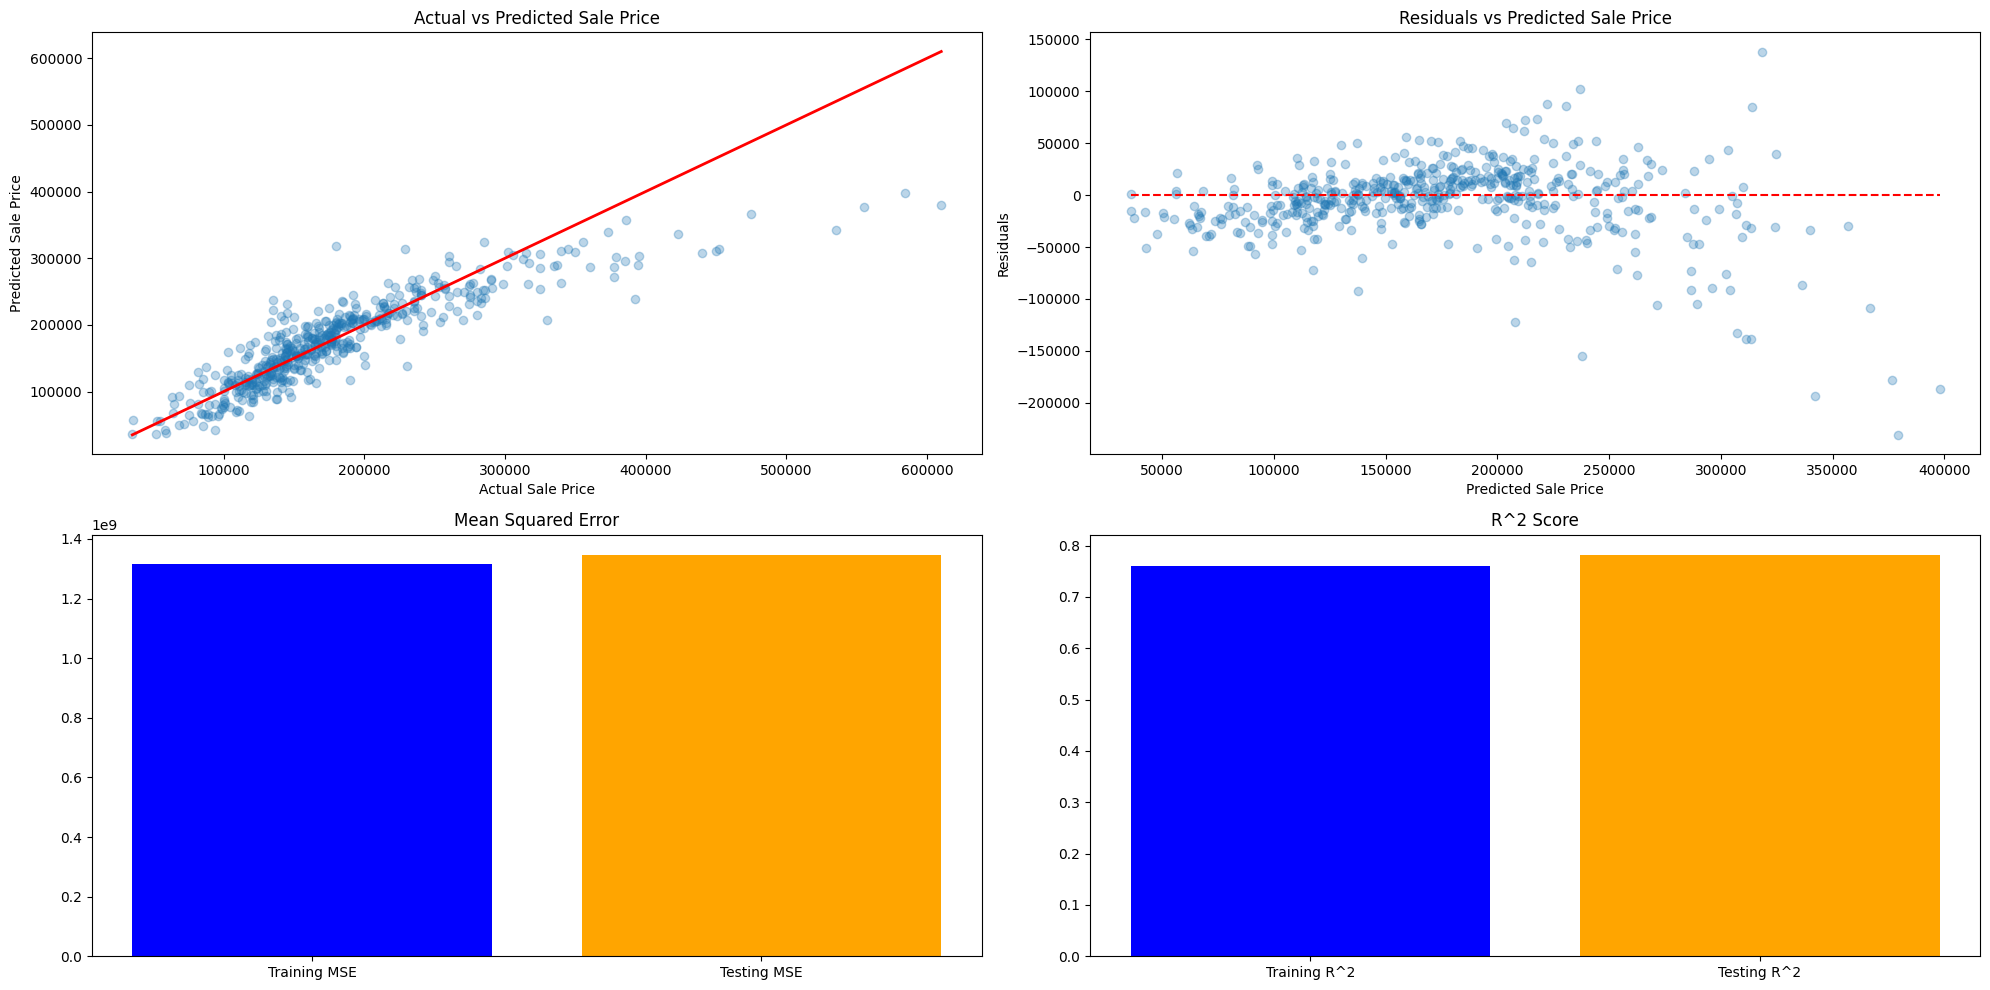

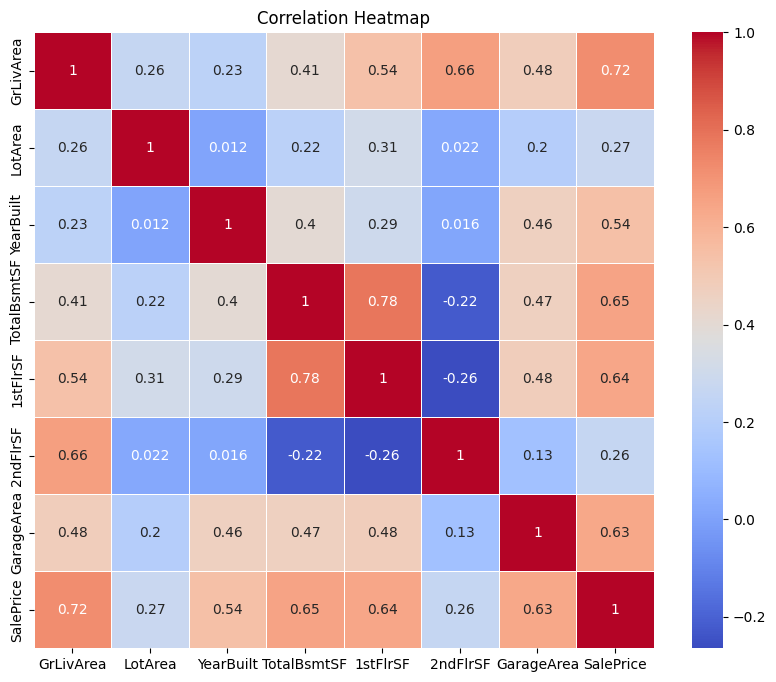

0.7602686800050096
0.7821845251585302


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the two CSV files
real_estate_data = pd.read_csv('Ames Real Estate Data.csv')
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Display the first few rows of each dataframe to understand their structure
real_estate_data_head = real_estate_data.head()
house_price_data_head = house_price_data.head()

real_estate_data_head, house_price_data_head


# Prepare the data
# Selecting a subset of features and target variable for simplicity
features = ['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']
target = 'SalePrice'

# Drop rows with missing values
house_price_data_clean = house_price_data[features + [target]].dropna()

# Split the data into training and testing sets
X = house_price_data_clean[features]
y = house_price_data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Prepare data for heatmap
correlation_matrix = house_price_data_clean.corr()

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, y_test_pred - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values = [mse_train, mse_test]
mse_labels = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels, mse_values, color=['blue', 'orange'])
plt.title('Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values = [r2_train, r2_test]
r2_labels = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels, r2_values, color=['blue', 'orange'])
plt.title('R^2 Score')

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(r2_train)
print(r2_test)


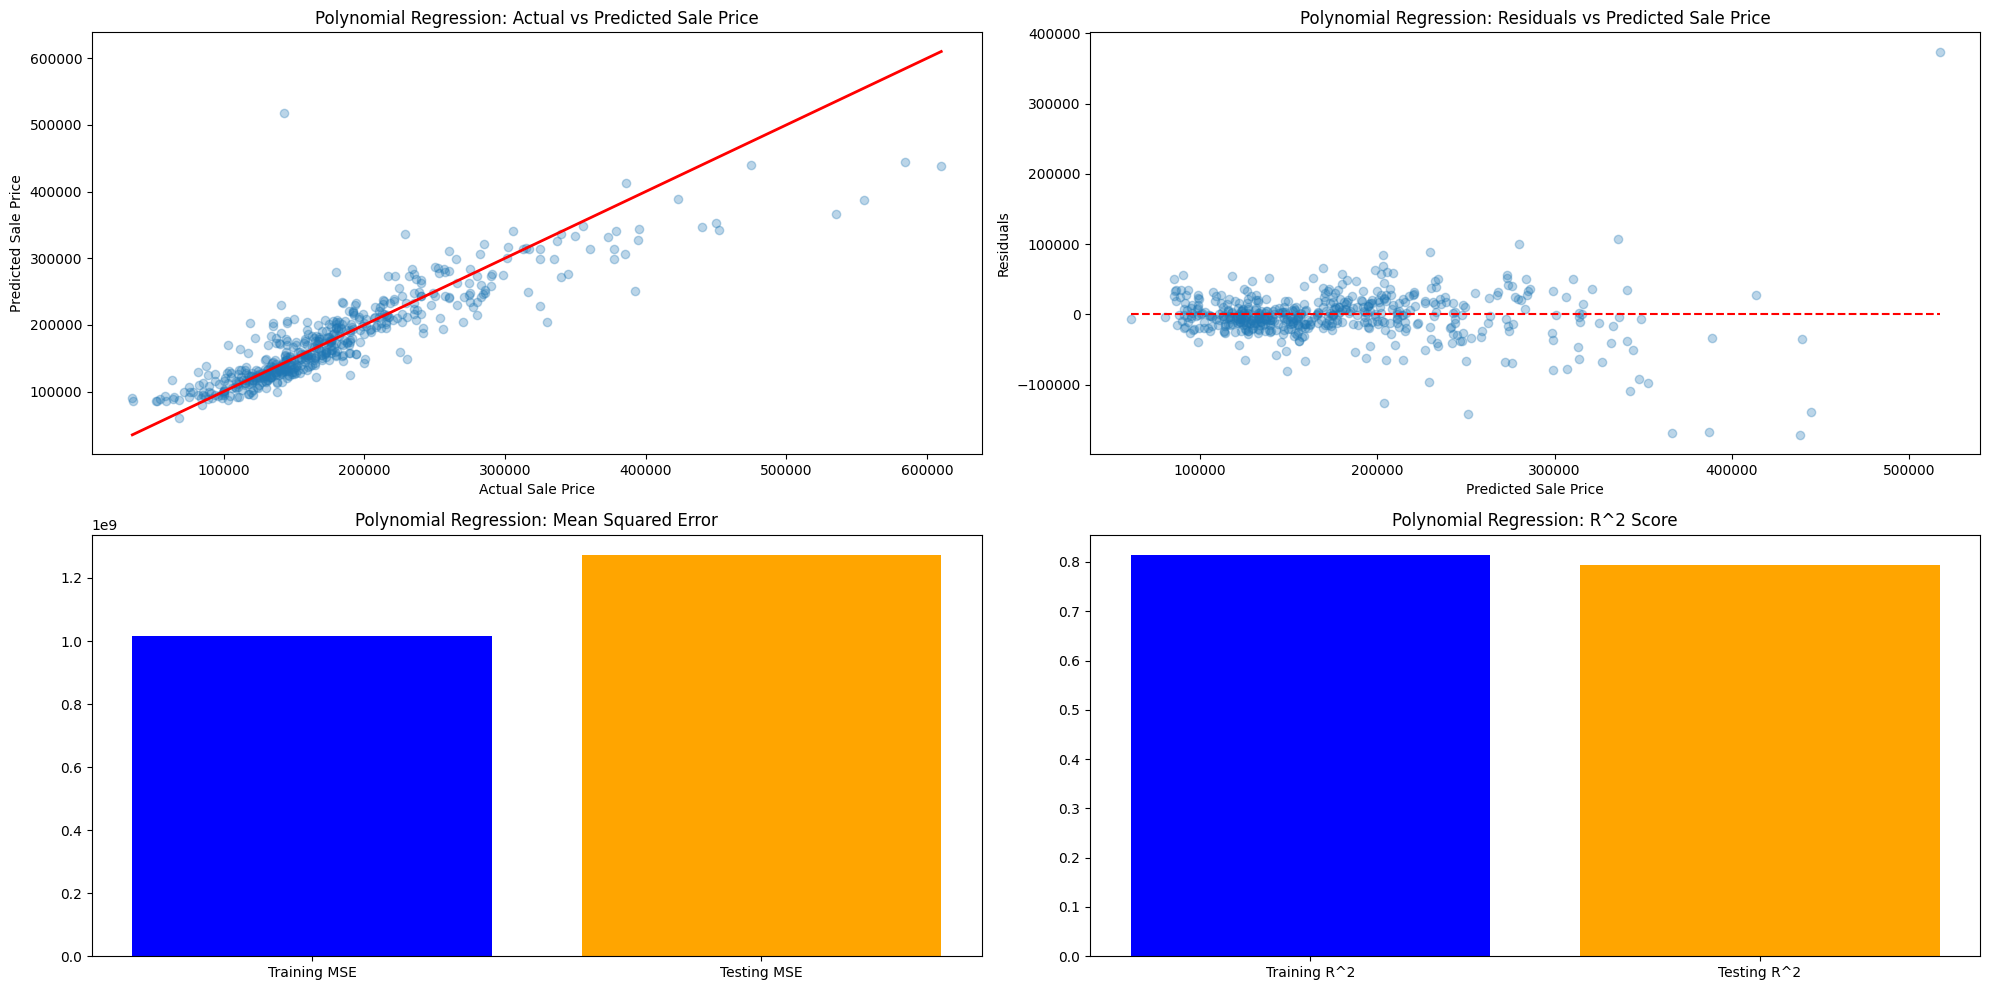

0.8147270147001205
0.7940652997095895


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a polynomial regression model (degree 2 for simplicity)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()
print(r2_train_poly)
print(r2_test_poly)


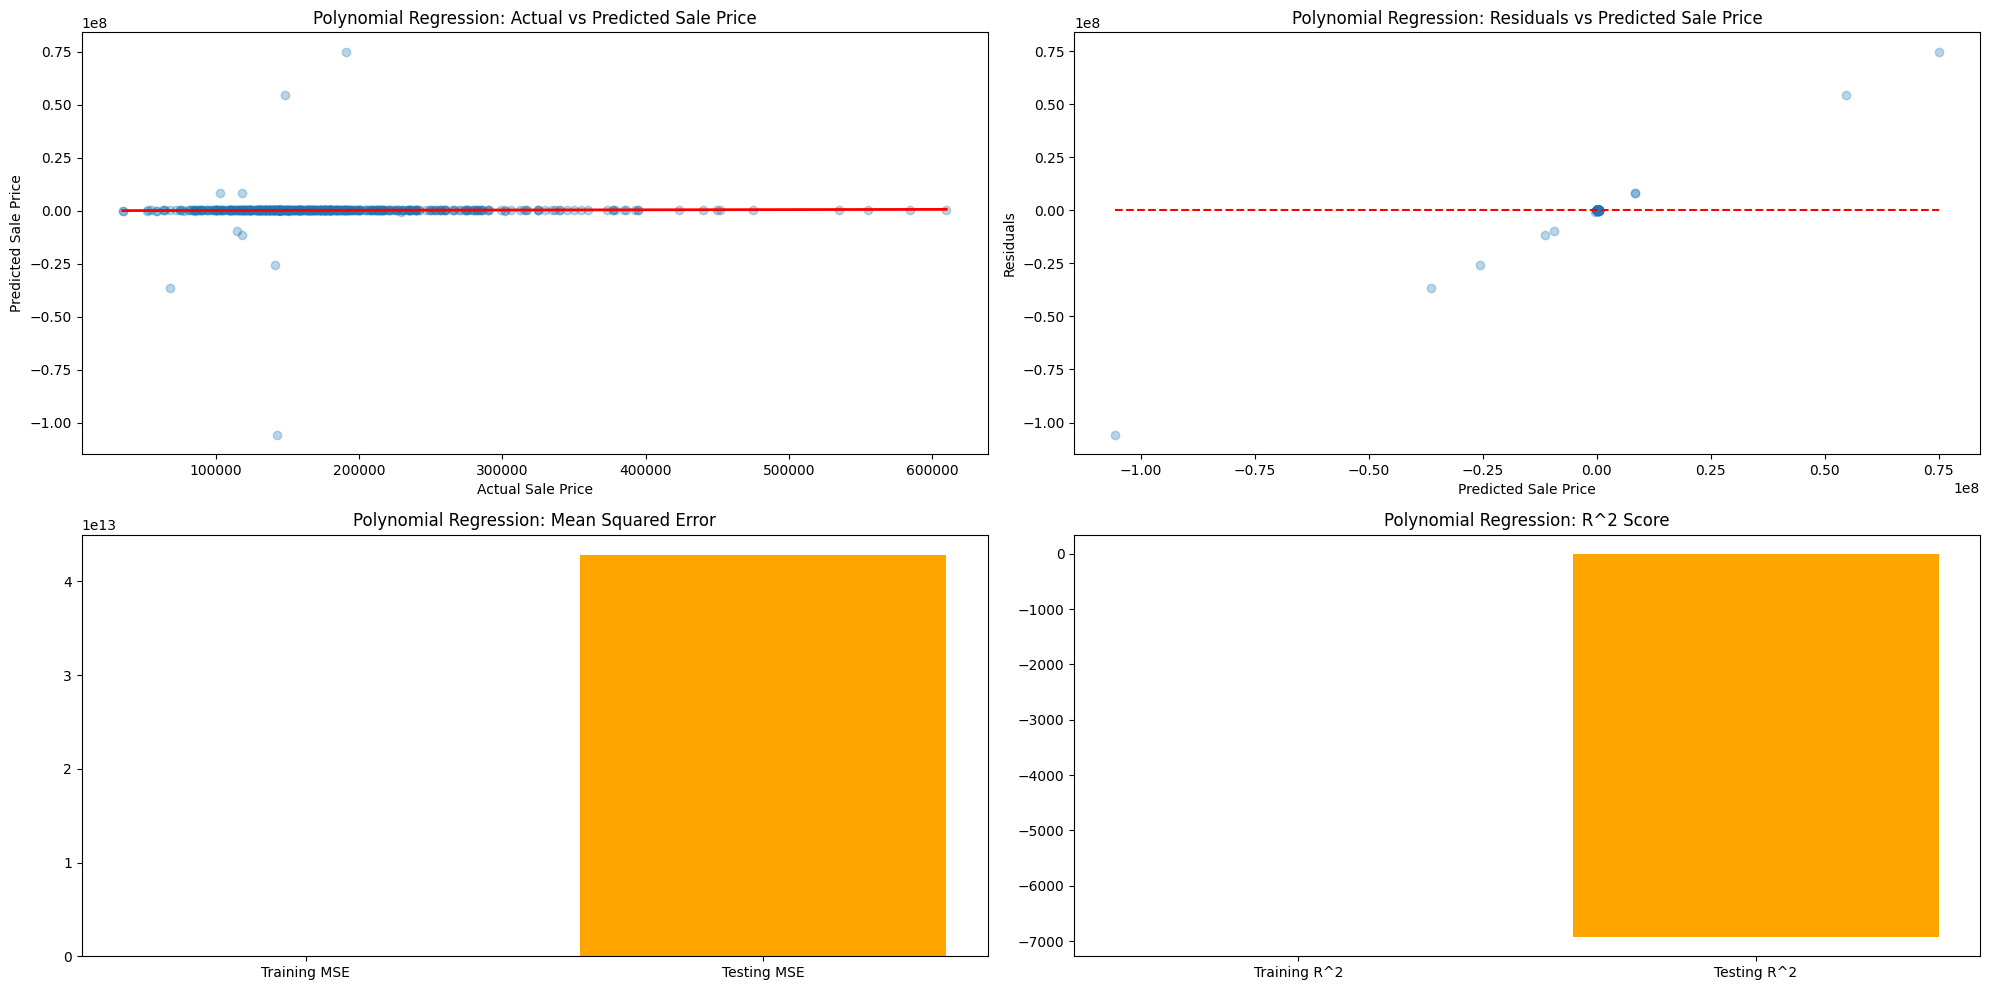

0.8611525570704108
-6928.263593725716


In [5]:
# Fit a polynomial regression model (degree 3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Calculate metrics
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Create the plots
plt.figure(figsize=(20, 10))

# Scatter plot with regression line
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Polynomial Regression: Actual vs Predicted Sale Price')

# Residual plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred_poly, y_test_pred_poly - y_test, alpha=0.3)
plt.hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Polynomial Regression: Residuals vs Predicted Sale Price')

# MSE bar plot
plt.subplot(2, 2, 3)
mse_values_poly = [mse_train_poly, mse_test_poly]
mse_labels_poly = ['Training MSE', 'Testing MSE']
plt.bar(mse_labels_poly, mse_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: Mean Squared Error')

# R^2 bar plot
plt.subplot(2, 2, 4)
r2_values_poly = [r2_train_poly, r2_test_poly]
r2_labels_poly = ['Training R^2', 'Testing R^2']
plt.bar(r2_labels_poly, r2_values_poly, color=['blue', 'orange'])
plt.title('Polynomial Regression: R^2 Score')

plt.tight_layout()
plt.show()

print(r2_train_poly)
print(r2_test_poly)

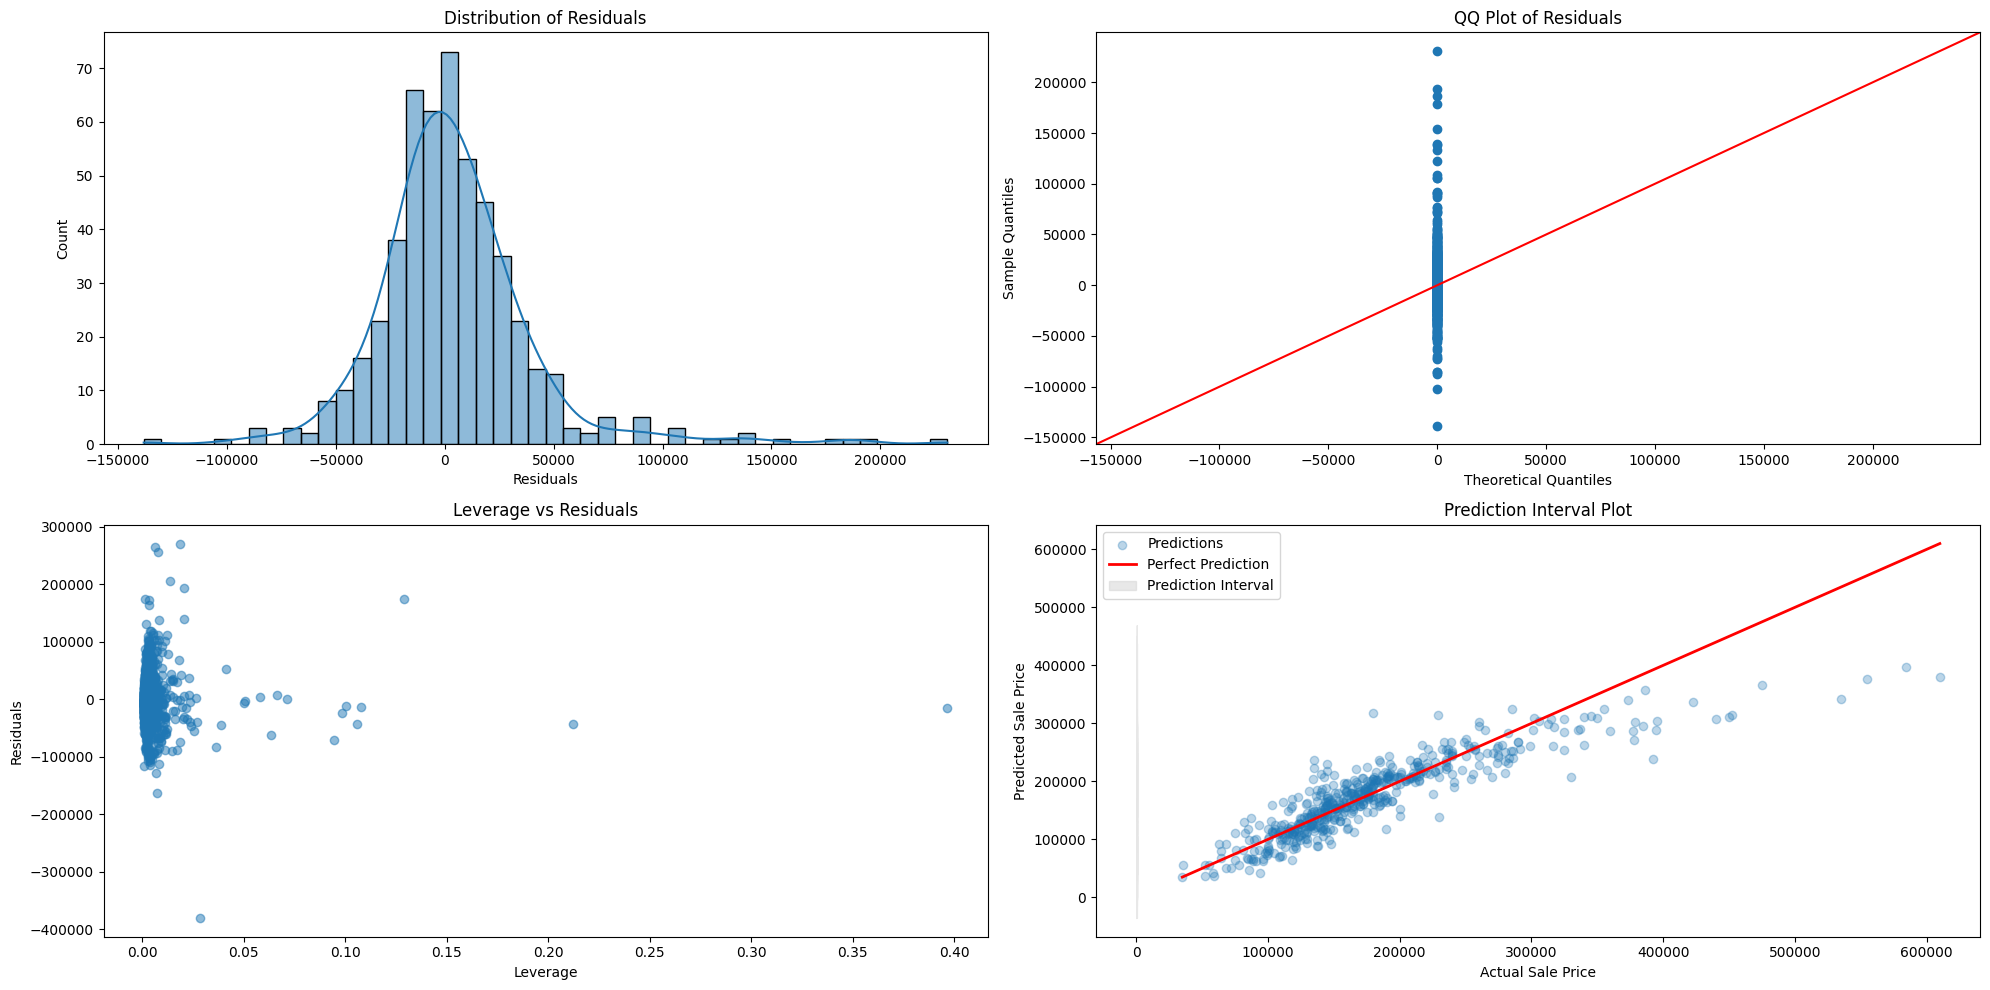

In [10]:
import statsmodels.api as sm
import numpy as np

# Residuals
residuals = y_test - y_test_pred

# Leverage values for training data
model_with_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, model_with_const).fit()
influence = ols_model.get_influence()
leverage_train = influence.hat_matrix_diag[:len(y_train)]
residuals_train = y_train - y_train_pred

plt.figure(figsize=(20, 10))

# Distribution of Residuals
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

# QQ Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('QQ Plot of Residuals')

# Leverage vs Residuals
plt.subplot(2, 2, 3)
plt.scatter(leverage_train, residuals_train, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Leverage vs Residuals')

# Prediction Interval Plot
plt.subplot(2, 2, 4)
preds_interval = np.array([y_test_pred - 1.96 * np.std(residuals), y_test_pred + 1.96 * np.std(residuals)])
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.fill_between(np.arange(len(y_test)), preds_interval[0], preds_interval[1], color='lightgrey', alpha=0.5, label='Prediction Interval')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Prediction Interval Plot')
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/4183509457.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')


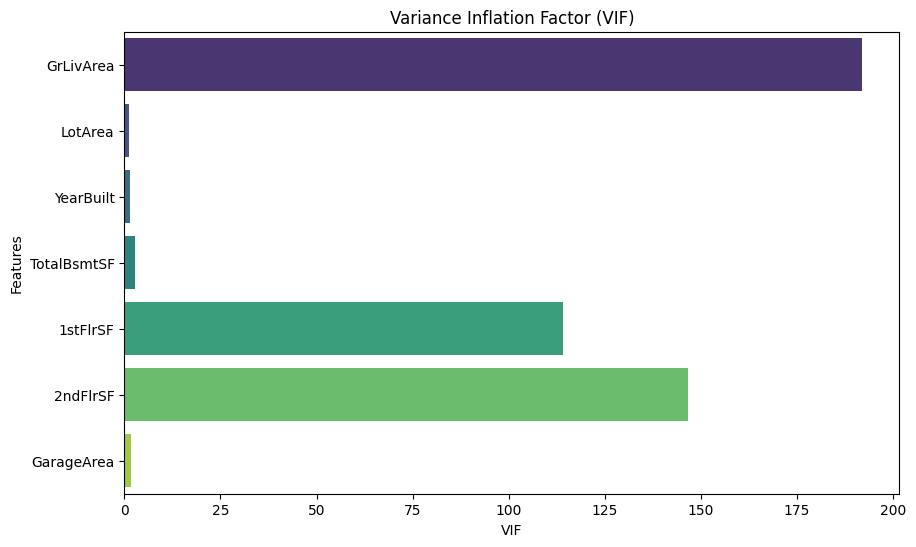

,Feature,VIF
0,GrLivArea,192.036309
1,LotArea,1.157193
2,YearBuilt,1.403417
3,TotalBsmtSF,2.706926
4,1stFlrSF,114.071186
5,2ndFlrSF,146.576640
6,GarageArea,1.633075


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(len(X_train.columns))]

# Plot VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

vif_data

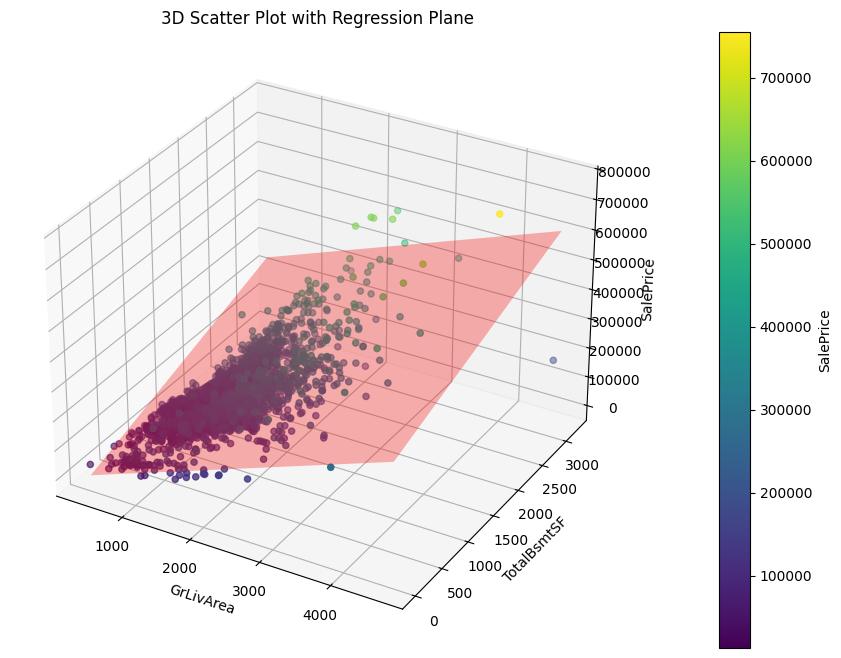

In [15]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Ensuring the correct dataframe and column names are used
house_price_data_clean_renamed = house_price_data_clean.rename(columns={
    '1stFlrSF': 'FirstFlrSF',
    '2ndFlrSF': 'SecondFlrSF'
})

# Update variable names to match renamed columns
x_var = 'GrLivArea'
y_var = 'TotalBsmtSF'
z_var = 'SalePrice'

# Fit a 3D linear regression model
X_3d = house_price_data_clean_renamed[[x_var, y_var]]
X_3d = sm.add_constant(X_3d)  # Add a constant term for the intercept
y_3d = house_price_data_clean_renamed[z_var]
model_3d = sm.OLS(y_3d, X_3d).fit()

# Create a grid of values for the independent variables
x_surf, y_surf = np.meshgrid(np.linspace(X_3d[x_var].min(), X_3d[x_var].max(), 100),
                             np.linspace(X_3d[y_var].min(), X_3d[y_var].max(), 100))

# Predict values for the grid
exog = pd.DataFrame({x_var: x_surf.ravel(), y_var: y_surf.ravel()})
exog = sm.add_constant(exog)
fittedY = model_3d.predict(exog).values.reshape(x_surf.shape)

# Plot the 3D scatter plot with the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, rstride=100, cstride=100)

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot with Regression Plane')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


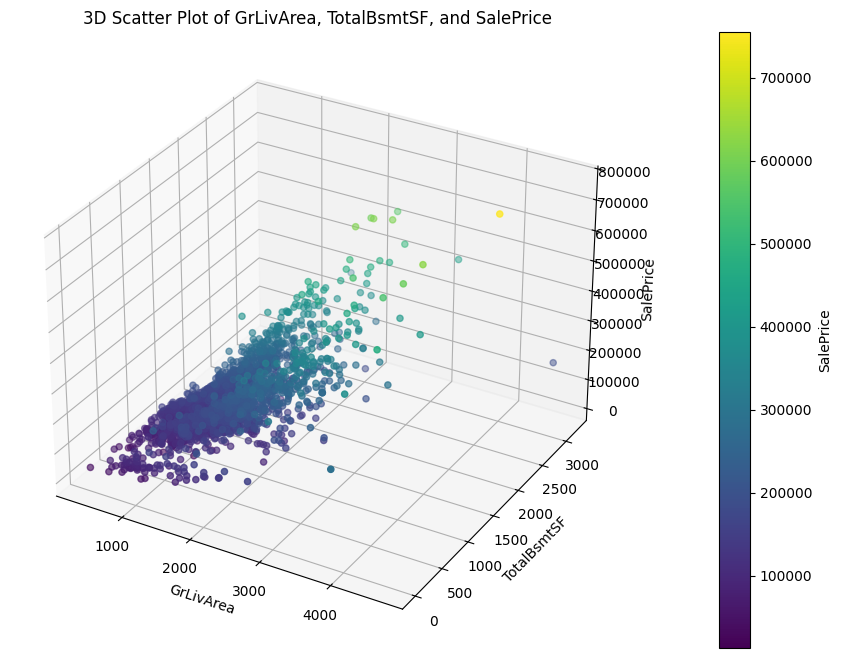

In [16]:
# Create 3D scatter plot without the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(house_price_data_clean_renamed[x_var], house_price_data_clean_renamed[y_var], house_price_data_clean_renamed[z_var], c=house_price_data_clean_renamed[z_var], cmap='viridis', marker='o')

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('3D Scatter Plot of GrLivArea, TotalBsmtSF, and SalePrice')

# Adding a color bar to indicate SalePrice
color_bar = plt.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('SalePrice')

plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Identify numeric columns
numeric_cols = house_price_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix using only numeric columns
corr_matrix = house_price_data[numeric_cols].corr()

# Select features with high correlation to the target variable (SalePrice)
high_corr_features = corr_matrix.index[corr_matrix['SalePrice'].abs() > 0.5].tolist()
high_corr_features.remove('SalePrice')  # Remove the target variable itself

# Subset the data with the selected high correlation features
features_high_corr = house_price_data[high_corr_features]
target = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_high_corr_encoded = pd.get_dummies(features_high_corr, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_high_corr_imputed = imputer.fit_transform(features_high_corr_encoded)

# Define the linear regression model
lr_model = LinearRegression()

# Define the forward selection feature selector
sfs_forward_high_corr = SequentialFeatureSelector(lr_model, direction='forward', n_features_to_select='auto')

# Fit the feature selector
sfs_forward_high_corr.fit(features_high_corr_imputed, target)

# Get the selected features
selected_features_forward_high_corr = features_high_corr_encoded.columns[sfs_forward_high_corr.get_support()]

selected_features_forward_high_corr



Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageArea'], dtype='object')

/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/948886148.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


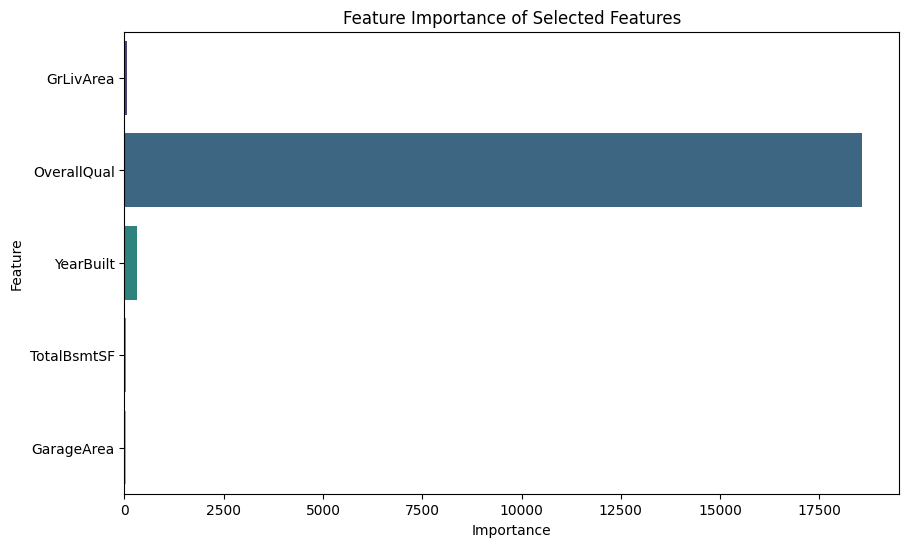

In [23]:
import seaborn as sns
# Fit the linear regression model on the selected features
selected_features_data = features_high_corr_encoded[selected_features_forward_high_corr]
model = LinearRegression()
# Fit the linear regression model on the selected features after handling missing values
selected_features_data_imputed = imputer.fit_transform(selected_features_data)
model.fit(selected_features_data_imputed, target)

# Get the coefficients
coefficients = model.coef_

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame({'Feature': selected_features_forward_high_corr, 'Importance': coefficients})

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance of Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_data_imputed, target, test_size=0.2, random_state=42)

# Train the linear regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1228464786.2957406, 0.8003044188963836)

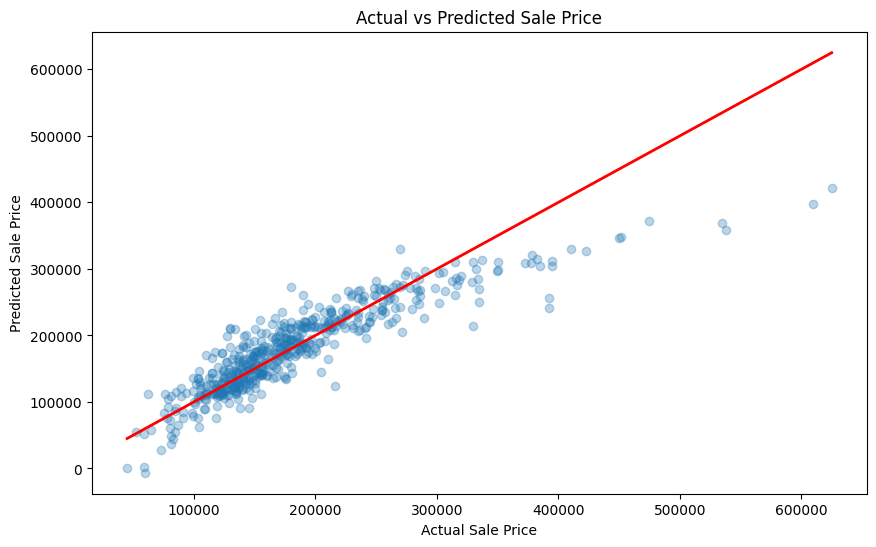

In [25]:
# Plotting the model predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

In [27]:
# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Train the linear regression model on the full dataset
model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model.predict(X_test_all)

# Calculate performance metrics
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

mse_all, r2_all


(534366722.1515574, 0.9131349353331806)

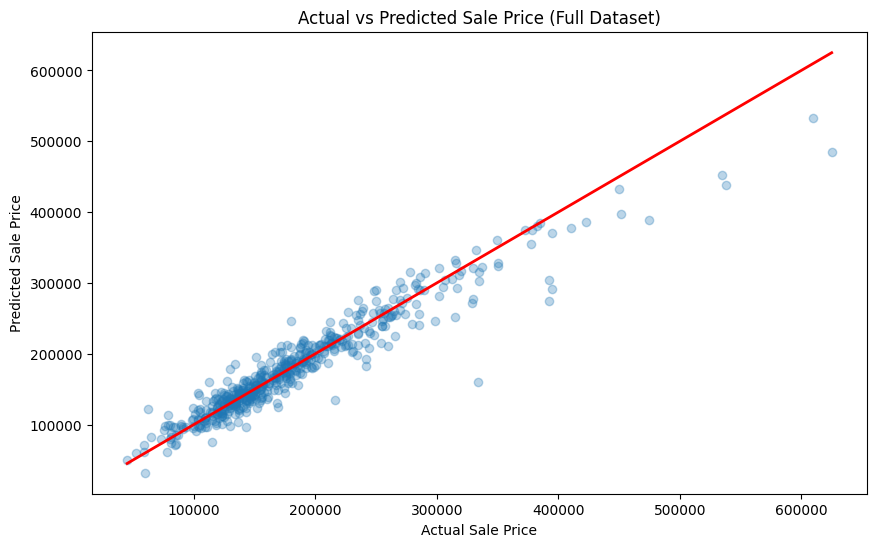

In [28]:
# Plotting the model predictions vs actual values for the full dataset model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_pred_all, alpha=0.3)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Full Dataset)')
plt.show()

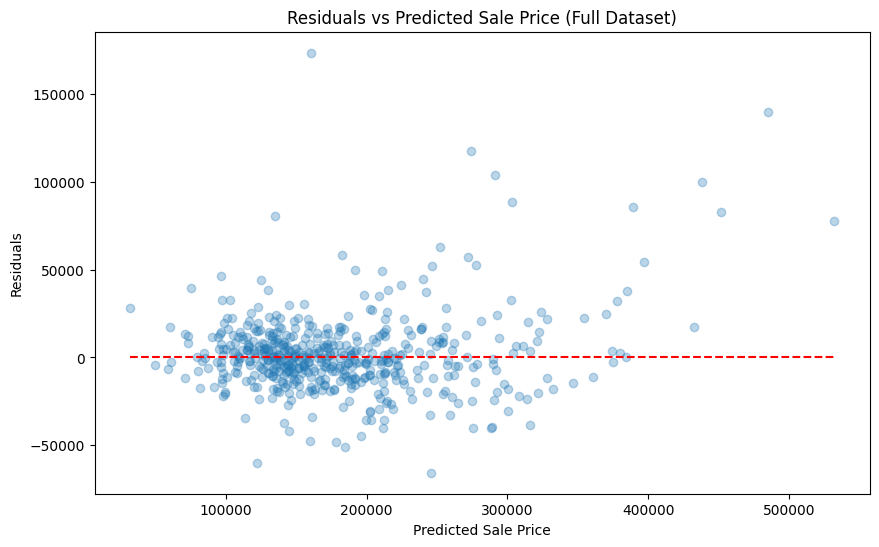

In [29]:
# Calculate the residuals
residuals = y_test_all - y_pred_all

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_all, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_all.min(), xmax=y_pred_all.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price (Full Dataset)')
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Define the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the full dataset
linear_model.fit(X_train_all, y_train_all)
random_forest_model.fit(X_train_all, y_train_all)
svr_model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_all)
y_pred_rf = random_forest_model.predict(X_test_all)
y_pred_svr = svr_model.predict(X_test_all)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test_all, y_pred_linear)
r2_linear = r2_score(y_test_all, y_pred_linear)
mae_linear = mean_absolute_error(y_test_all, y_pred_linear)

mse_rf = mean_squared_error(y_test_all, y_pred_rf)
r2_rf = r2_score(y_test_all, y_pred_rf)
mae_rf = mean_absolute_error(y_test_all, y_pred_rf)

mse_svr = mean_squared_error(y_test_all, y_pred_svr)
r2_svr = r2_score(y_test_all, y_pred_svr)
mae_svr = mean_absolute_error(y_test_all, y_pred_svr)

performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regression'],
    'MSE': [mse_linear, mse_rf, mse_svr],
    'R^2': [r2_linear, r2_rf, r2_svr],
    'MAE': [mae_linear, mae_rf, mae_svr]
})

print(performance_comparison)


                       Model           MSE       R^2           MAE
0          Linear Regression  5.343667e+08  0.913135  14712.850884
1              Random Forest  6.514445e+08  0.894103  15963.918275
2  Support Vector Regression  6.725165e+09 -0.093223  55020.103473


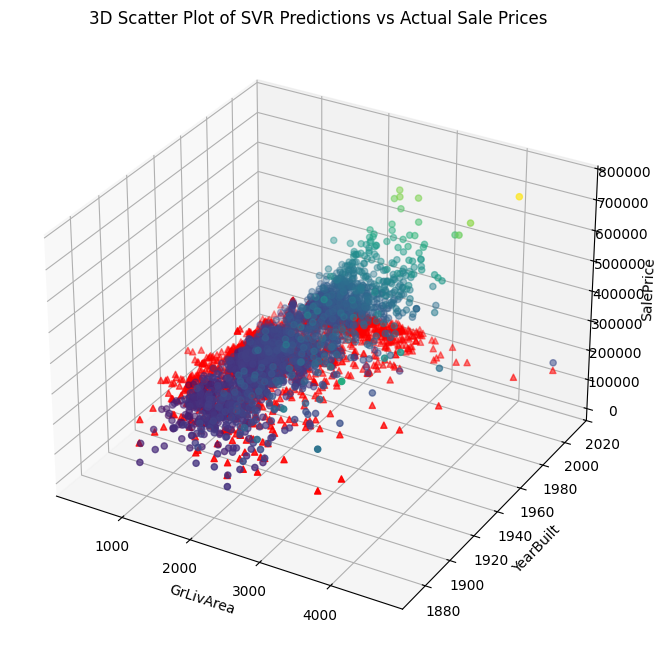

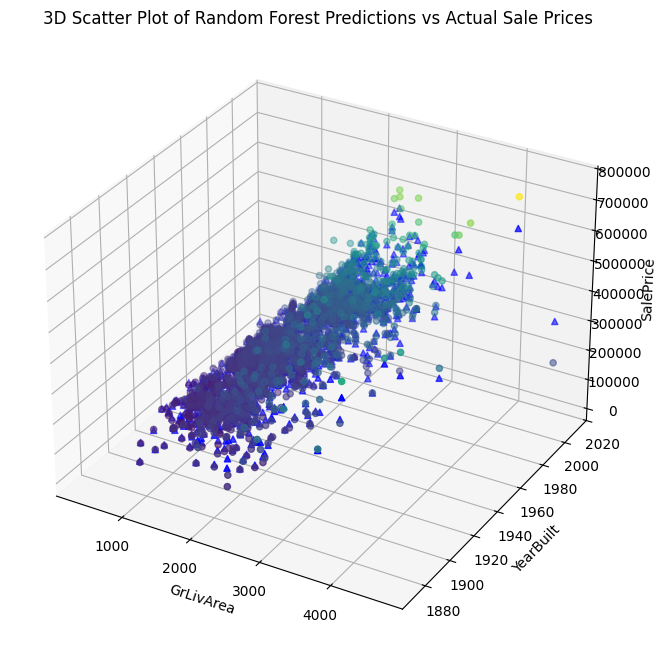

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all_original_imputed, target_original, test_size=0.2, random_state=42)

# Define the models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Train the models on the full dataset
random_forest_model.fit(X_train_all, y_train_all)
svr_model.fit(X_train_all, y_train_all)

# Select three features to visualize their interaction in 3D
x_feature = 'GrLivArea'
y_feature = 'YearBuilt'
z_feature = 'SalePrice'

# Subset the data for visualization
subset_data = house_price_data[[x_feature, y_feature, z_feature]].dropna()

# Encode and impute the subset data
subset_data_encoded = pd.get_dummies(subset_data.drop(columns=z_feature), drop_first=True)
subset_data_imputed = imputer.transform(subset_data_encoded)

# SVR predictions on subset data
y_pred_svr_subset = svr_model.predict(subset_data_imputed)

# Create a 3D scatter plot for SVR
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(subset_data[x_feature], subset_data[y_feature], subset_data[z_feature], c=subset_data[z_feature], cmap='viridis', marker='o')
ax.scatter(subset_data[x_feature], subset_data[y_feature], y_pred_svr_subset, c='r', marker='^')

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Scatter Plot of SVR Predictions vs Actual Sale Prices')

plt.show()

# Random Forest predictions on subset data
y_pred_rf_subset = random_forest_model.predict(subset_data_imputed)

# Create a 3D scatter plot for Random Forest
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(subset_data[x_feature], subset_data[y_feature], subset_data[z_feature], c=subset_data[z_feature], cmap='viridis', marker='o')
ax.scatter(subset_data[x_feature], subset_data[y_feature], y_pred_rf_subset, c='b', marker='^')

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Scatter Plot of Random Forest Predictions vs Actual Sale Prices')

plt.show()


/var/folders/tc/54b4pvwj76q1zqy8qd633vf40000gn/T/ipykernel_7140/1306588568.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


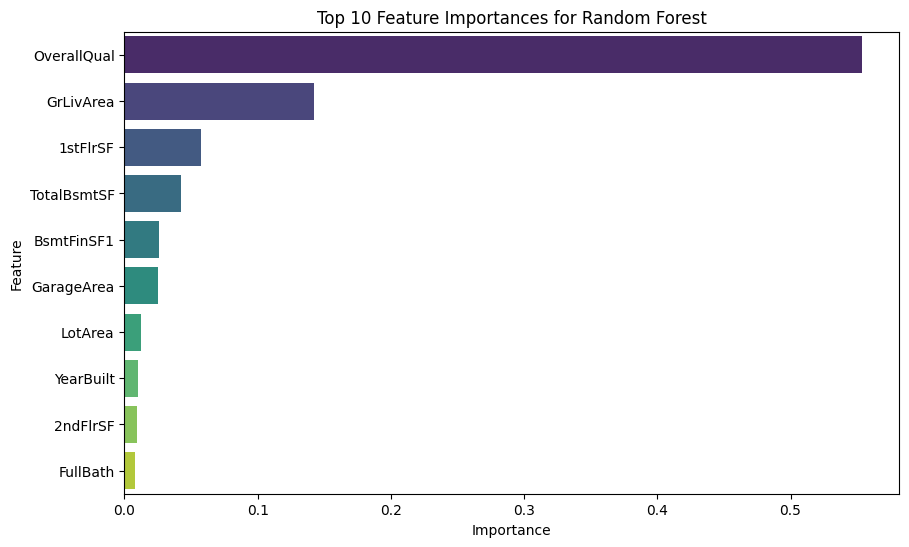

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Separate features and target variable
features_all_original = house_price_data.drop(columns=['SalePrice'])
target_original = house_price_data['SalePrice']

# Handle non-numeric features by converting categorical variables to numeric using one-hot encoding
features_all_original_encoded = pd.get_dummies(features_all_original, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_all_original_imputed = imputer.fit_transform(features_all_original_encoded)

# Define the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the full dataset
random_forest_model.fit(features_all_original_imputed, target_original)

# Get the feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features_all_original_encoded.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)  # Display top 10 features for clarity

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Feature Importances for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


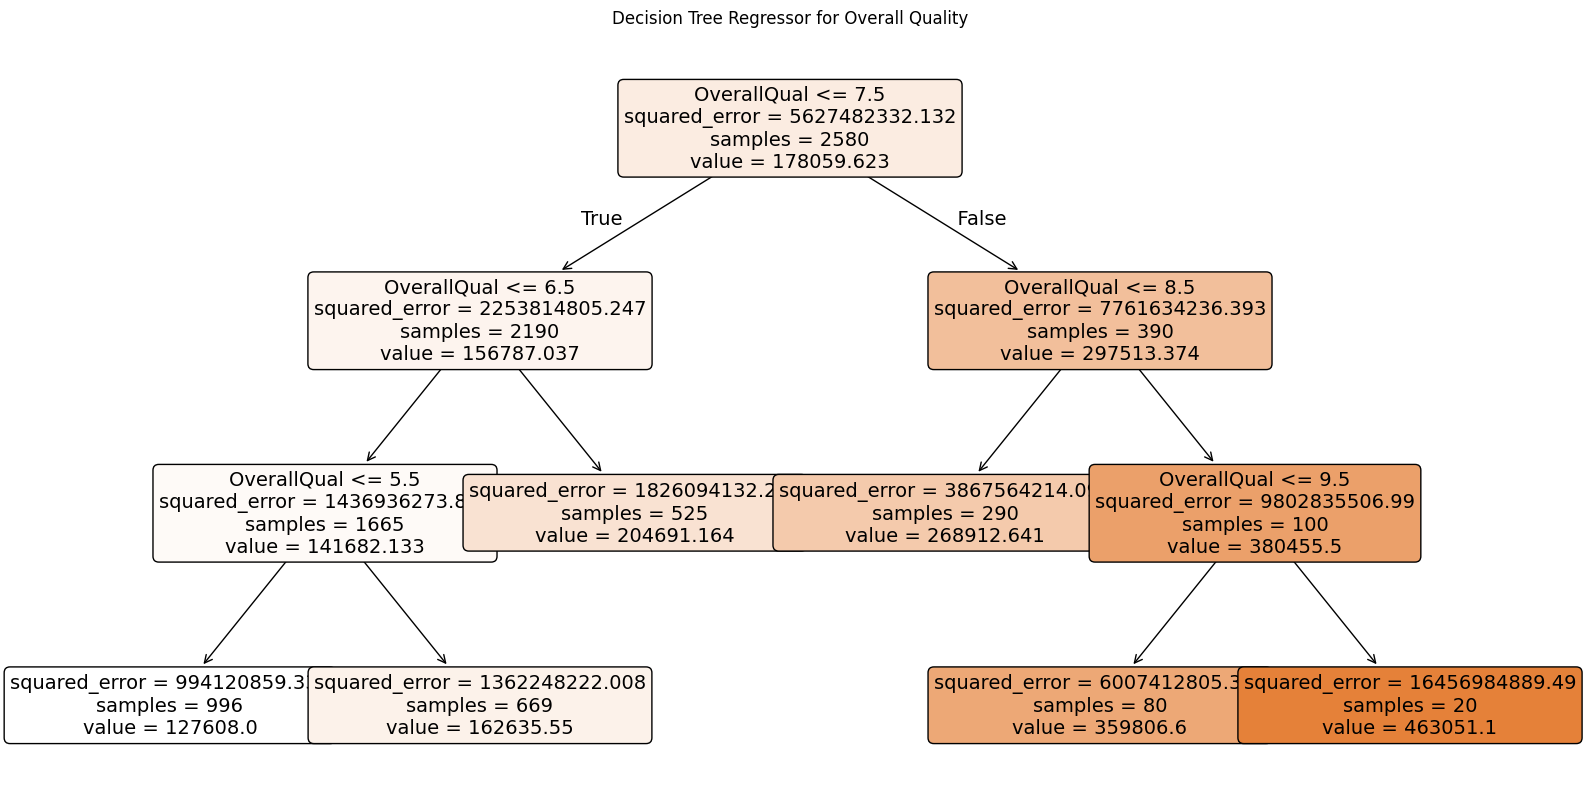

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Fit a Decision Tree model on the 'OverallQual' feature
X_overall_qual = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Initialize and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_overall_qual, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=['OverallQual'], filled=True, rounded=True, fontsize=14)
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Load the original dataset
house_price_data = pd.read_csv('Ames_HousePrice.csv')

# Prepare data for plotting
X = house_price_data[['OverallQual']]
y = house_price_data['SalePrice']

# Fit the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Generate a grid of values for OverallQual
qual_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
price_pred = tree_model.predict(qual_grid)

# Plot the tree decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=20, edgecolor='k', alpha=0.6)
plt.plot(qual_grid, price_pred, color='red', linewidth=2)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Decision Tree Regressor for Overall Quality')
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().